# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования


Выполнили студенты гр. 2381 Соколов Сергей Александрович и Тищенко Артем Михайлович. Вариант №2.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения


В работе будут проанализированы следующие фильтры:
- Линейный по 5 точкам:
  - $y(n) = \frac{1}{5}\sum_{k = n - 2} ^ {n + 2} x_k $
  - $H(\omega) = \frac{1}{5} (1 + 2 \cos(\omega) + 2 \cos(2\omega))$

- Линейный по 9 точкам:
  - $y(n) = \frac{1}{9}\sum_{k = n - 4} ^ {n + 4} x_k $
  - $H(\omega) = \frac{1}{9} (1 + 2 \cos(\omega) + 2 \cos(2\omega) + 2 \cos(3\omega)+ 2 \cos(4\omega))$


- Численное дифференцирование 1-го порядка:
  - $y(n) = \frac{s_{n+1} - s_{n-1}}{2}$
  - $H(\omega) = i\sin(\omega)$

- Численное интегрирование методом прямоугольника:
  - $y_{n+1} = y_n + s_{n+0.5}$
  - $H(\omega) =\frac{1}{2i ⋅ sin(ω/2)}$

- Численное интегрирование методом трапеций:
  - $y_{n+1} = y_n + \frac{1}{2} (s_n + s_{n+1})$
  - $H(\omega) = \frac{\cos(ω/2)}{2i ⋅ \sin(ω/2)}$

- Численное интегрирование методом Симпсона:
  - $y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1})$
  - $H(\omega) = \frac{2+\cos(\omega)}{3i \sin(ω)}$

Для построения и анализа спектра будет применятся дискретное преобразование Фурье:

$$X(n) = \sum_{k=0} ^ {N - 1} x_k e^{-i \frac{2 \pi n}{N} k} $$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.



## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(32567)

### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

In [ ]:
T = 1
N = 31

frequencies = np.linspace(0, np.pi, 11)     # частоты
amplitudes = np.random.randint(1, 12, 11)   # амплитуды
phases = np.random.uniform(0, 0.5, 11)      # началные фазы

dtime = np.linspace(0, N, N+1)              # дискретизированное время
atime = np.linspace(0, N, N * 1000 + 1)     # аналоговое время

asig = np.zeros_like(atime)                 # аналоговый сигнал
for freq, amp, ph in zip(frequencies, amplitudes, phases):
    asig += amp * np.cos(freq * atime + ph)
asig /= sum(amplitudes)

dsig = asig[::1000]                         # дискретизированный сигнал

### Задание 2

Визуализировать исходные аналоговый и дискретизированный сигналы.


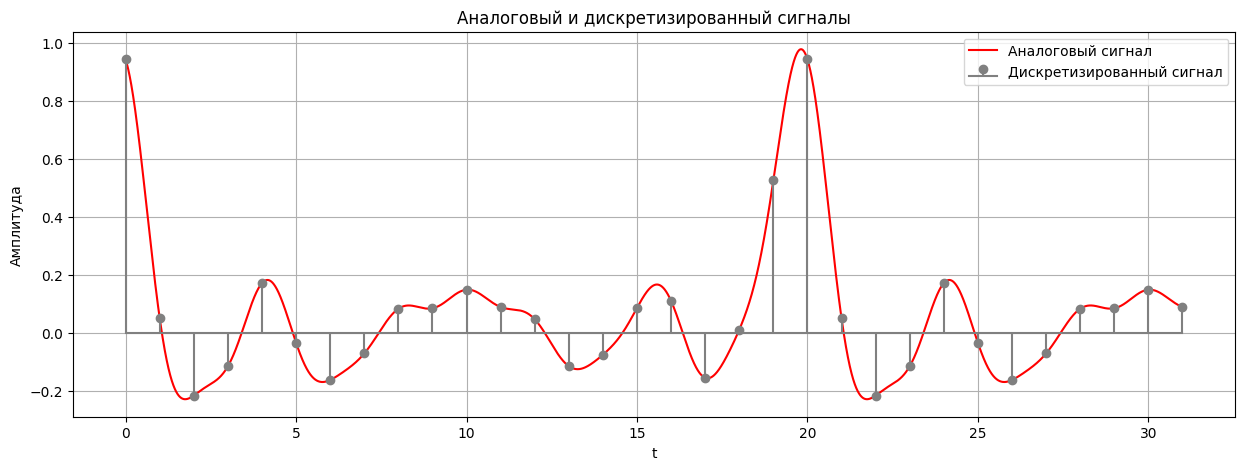

In [ ]:
plt.figure(figsize=(15, 5))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Амплитуда')

plt.title('Аналоговый и дискретизированный сигналы')
plt.plot(atime, asig, 'red', label='Аналоговый сигнал')
plt.stem(dtime, dsig, 'gray', basefmt='gray', label='Дискретизированный сигнал')

plt.legend()
plt.show()

### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


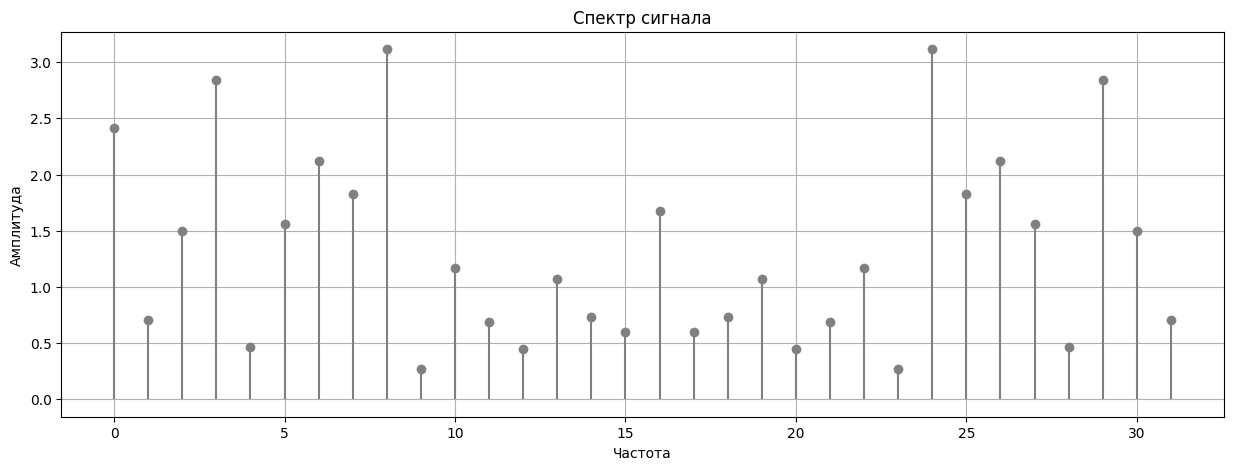

In [ ]:
spectrum = np.zeros(N + 1, dtype = 'complex')
for k in range(N + 1):
    for m in range(N + 1):
        spectrum[k] += dsig[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

plt.figure(figsize=(15, 5))
plt.title('Спектр сигнала')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray', markerfmt='gray', basefmt=' ')
plt.show()

### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.


Когда $2n+1=5$

$H(\omega) = \frac{1}{5} (1 + 2 \cos(\omega) + 2 \cos(2\omega))$

Когда $2n+1=9$

$H(\omega) = \frac{1}{9} (1 + 2 \cos(\omega) + 2 \cos(2\omega) + 2 \cos(3\omega)+ 2 \cos(4\omega))$

In [ ]:
smooth_5 = np.zeros_like(dsig)
smooth_5[0:2] = dsig[0:2]
smooth_5[-2:] = dsig[-2:]
smooth_5[2: -2] = (dsig[0:-4] + dsig[1:-3] + dsig[2:-2] + dsig[3:-1] + dsig[4:]) / 5

smooth_9 = np.zeros_like(dsig)
smooth_9[0:4] = dsig[0:4]
smooth_9[-4:] = dsig[-4:]
smooth_9[4: -4] = (dsig[0:-8] + dsig[1:-7] + dsig[2:-6] + dsig[3:-5] +
                   dsig[4:-4] + dsig[5:-3] + dsig[6:-2] + dsig[7:-1] +
                   dsig[8:]) / 9

### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

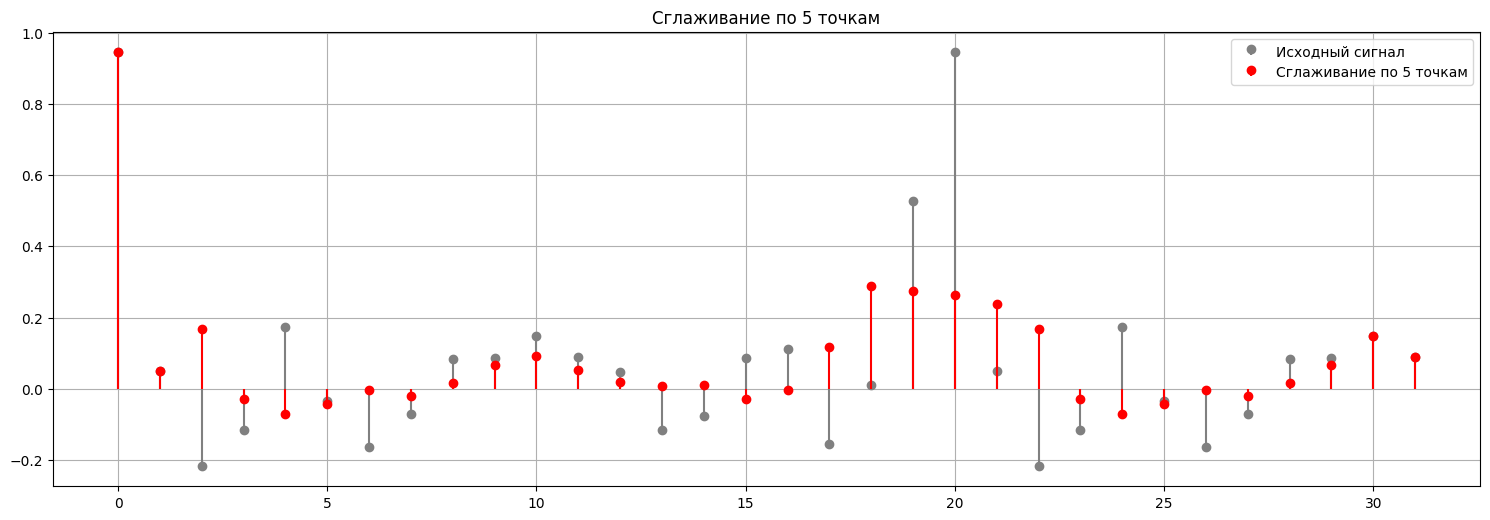

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_5, 'r', label='Сглаживание по 5 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Сглаживание по 5 точкам')

plt.tight_layout()
plt.show()

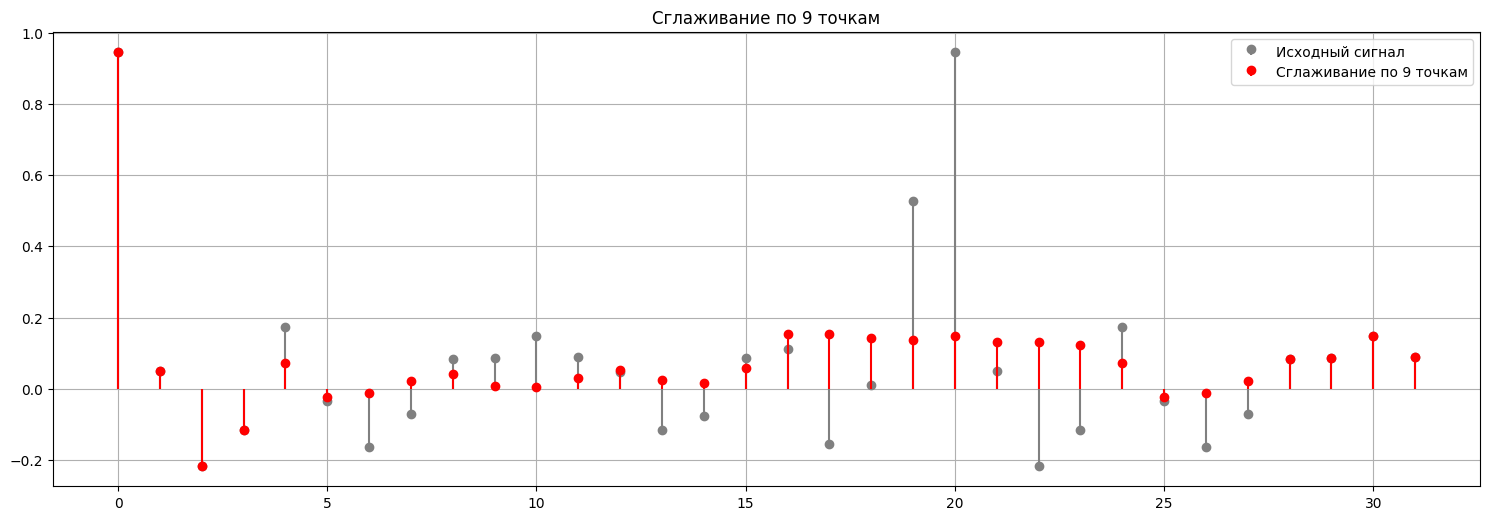

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_9, 'r', label='Сглаживание по 9 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Сглаживание по 9 точкам')

plt.tight_layout()
plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.


In [ ]:
spectrum_smoothed_5 = np.zeros(N + 1, dtype = 'complex')
spectrum_smoothed_9 = np.zeros(N + 1, dtype = 'complex')

for k in range(N + 1):
    for m in range(N + 1):
        spectrum_smoothed_5[k] += smooth_5[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))
        spectrum_smoothed_9[k] += smooth_9[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

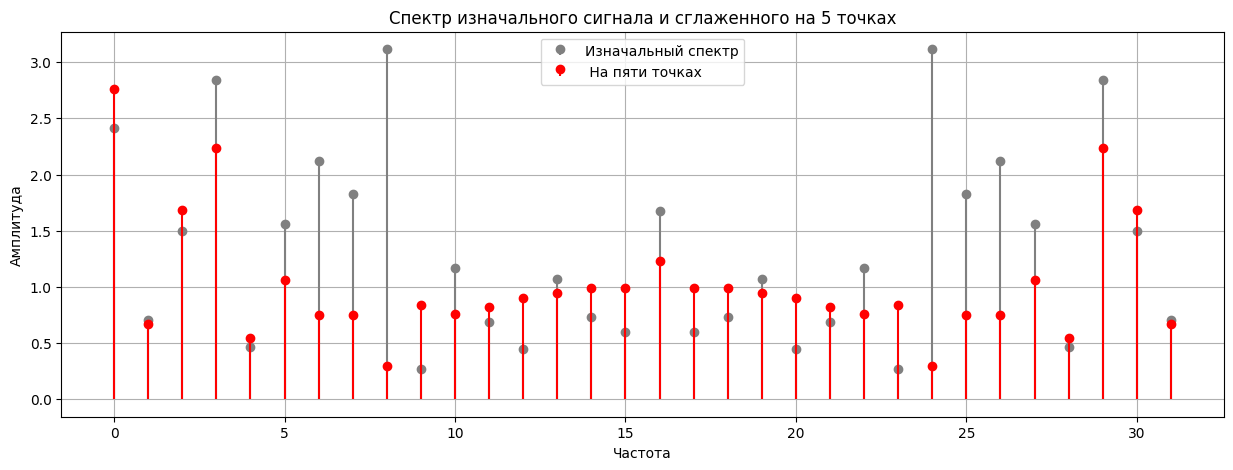

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и сглаженного на 5 точках')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_smoothed_5), linefmt='red',
         markerfmt='red', basefmt=' ', label=' На пяти точках')
plt.legend()
plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H(ω)$. Сделать выводы.


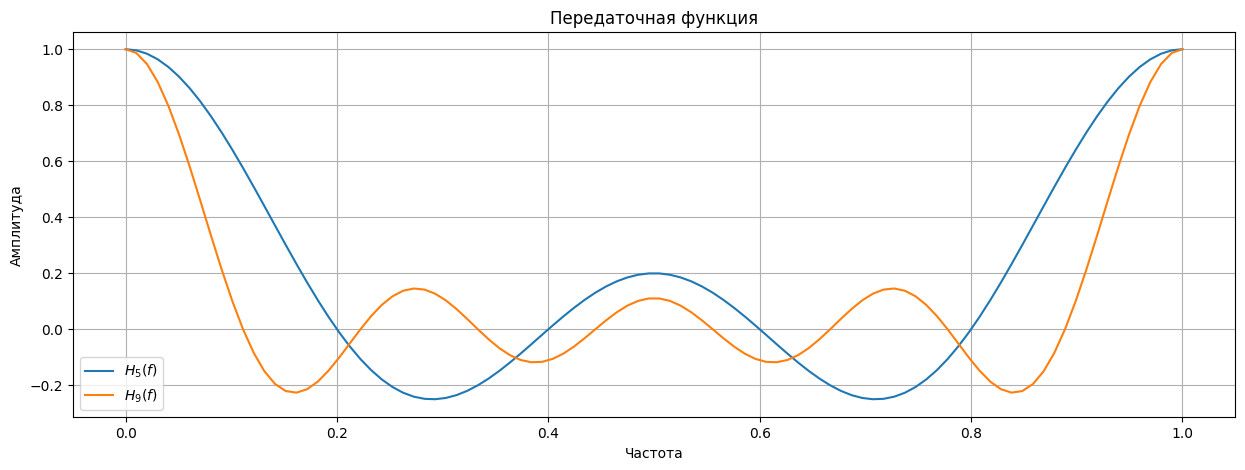

In [ ]:
t = np.linspace(0, 1, 100)
f = 2 * np.pi * np.linspace(0, 1, 100)

H_5 = (1 + 2 * (np.cos(f) + np.cos(2 * f))) / 5
H_9 = (1 + 2 * (np.cos(f) + np.cos(2 * f) + np.cos(3 * f) + np.cos(4 * f))) / 9

plt.figure(figsize=(15, 5))
plt.title("Передаточная функция")
plt.ylabel('Амплитуда')
plt.xlabel('Частота')
plt.grid(True)
plt.plot(t, H_5, label = "$H_5(f)$")
plt.plot(t, H_9, label = "$H_9(f)$")
plt.legend()
plt.show()

Из графиков передаточных функций видно, что частоты около нуля не подавляются, далее при увеличение частоты подавление становится сильнее, причем при 9 точках подавление более резкое, а после передаточная функция начинает колебаться. Что соответствует полученным ранее графикам.

### Задание 8

Повторить п. 4–7 для следующих фильтров:
* Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
* Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).


#### Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка

$y(n) = \frac{s_{n+1} - s_{n-1}}{2}$

$H(\omega) = i\sin(\omega)$

In [ ]:
diff_1 = np.zeros_like(dsig)
diff_1[0] = 0
diff_1[-1] = 0
diff_1[1: -1] = (dsig[2:] - dsig[:-2]) / 2

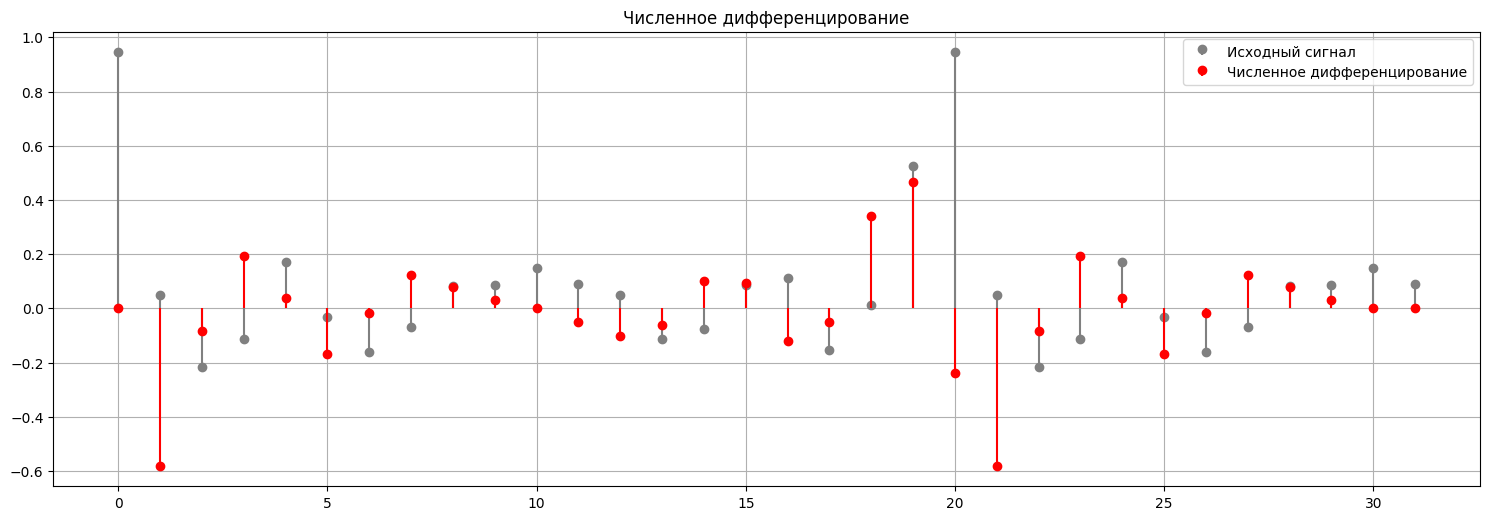

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, diff_1, 'r', label='Численное дифференцирование', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Численное дифференцирование')

plt.tight_layout()
plt.show()

In [ ]:
spectrum_diff = np.zeros(N + 1, dtype = 'complex')

for k in range(N + 1):
    for m in range(N + 1):
        spectrum_diff[k] += diff_1[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

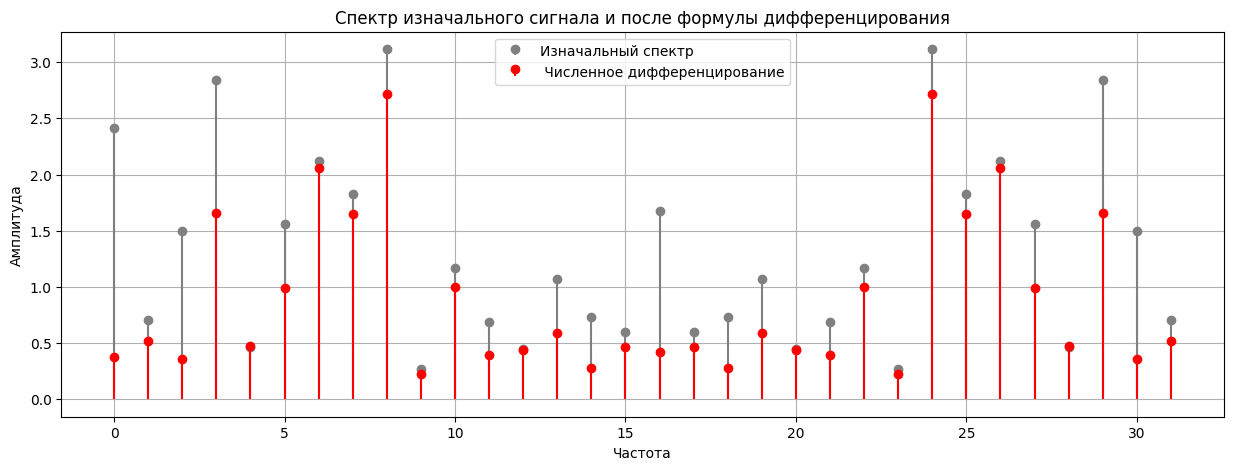

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и после формулы дифференцирования')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_diff), linefmt='red',
         markerfmt='red', basefmt=' ', label=' Численное дифференцирование')
plt.legend()
plt.show()

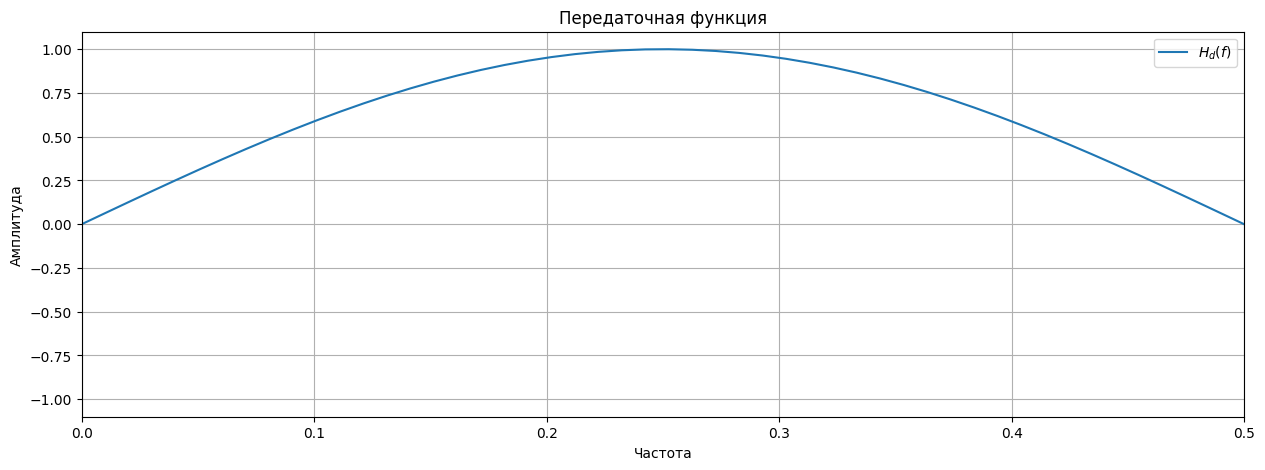

In [ ]:
t = np.linspace(0, 1, 100)
f = 2 * np.pi * np.linspace(0, 1, 100)

H_diff =  np.sin(f)

plt.figure(figsize=(15, 5))
plt.title("Передаточная функция")
plt.ylabel('Амплитуда')
plt.xlabel('Частота')
plt.xlim(0, 0.5)
plt.grid(True)
plt.plot(t, H_diff, label = "$H_{d}(f)$")
plt.legend()
plt.show()

Из графиков передаточных функций видно, что низкие и высокие частоты подавляются, а средние $-$ нет. Что соответствует полученным ранее графикам.

#### Дискретный фильтр, соответствующий численному интегрированию

Численное интегрирование методом прямоугольника:
  - $y_{n+1} = y_n + s_{n+0.5}$
  - $H(\omega) =\frac{1}{2i ⋅ sin(ω/2)}$

Численное интегрирование методом трапеций:
  - $y_{n+1} = y_n + \frac{1}{2} (s_n + s_{n+1})$
  - $H(\omega) = \frac{\cos(ω/2)}{2i ⋅ \sin(ω/2)}$

Численное интегрирование методом Симпсона:
  - $y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1})$
  - $H(\omega) = \frac{2+\cos(\omega)}{3i \sin(ω)}$

In [ ]:
integ_rec = np.zeros_like(dsig)
for i in range(1, len(dsig)):
    integ_rec[i] = integ_rec[i - 1] + asig[i * 1000 - 500]

integ_trap = np.zeros_like(dsig)
for i in range(1, len(dsig)):
    integ_trap[i] = integ_trap[i - 1] + (dsig[i - 1] + dsig[i]) / 2

integ_simp = np.zeros_like(dsig)
for i in range(1, len(dsig) - 1):
    integ_simp[i] = integ_simp[i - 1] + (dsig[i - 1] + 4 * dsig[i] + dsig[i + 1]) / 3


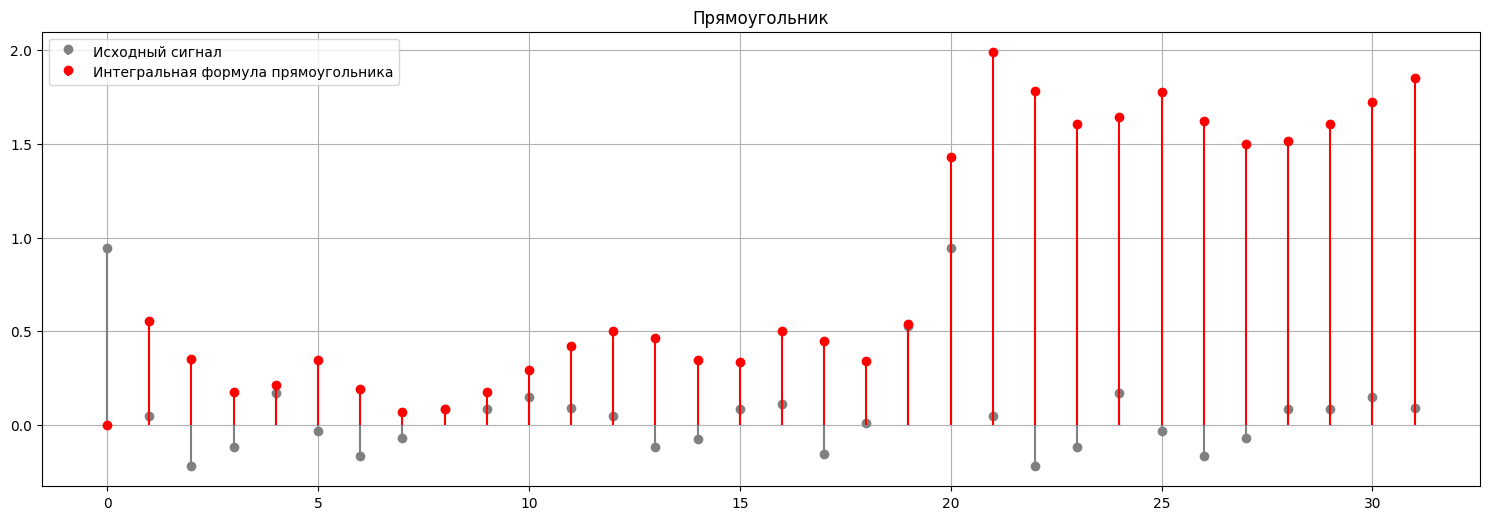

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, integ_rec, 'r', label='Интегральная формула прямоугольника', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Прямоугольник')

plt.tight_layout()
plt.show()

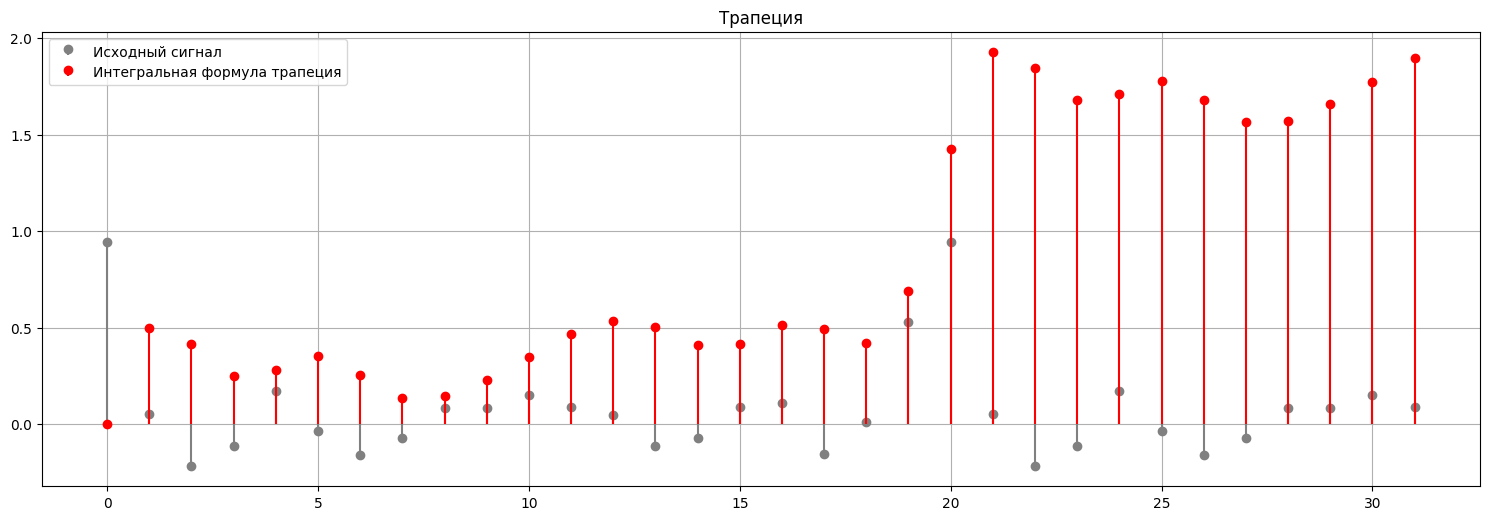

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, integ_trap, 'r', label='Интегральная формула трапеция', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Трапеция')

plt.tight_layout()
plt.show()

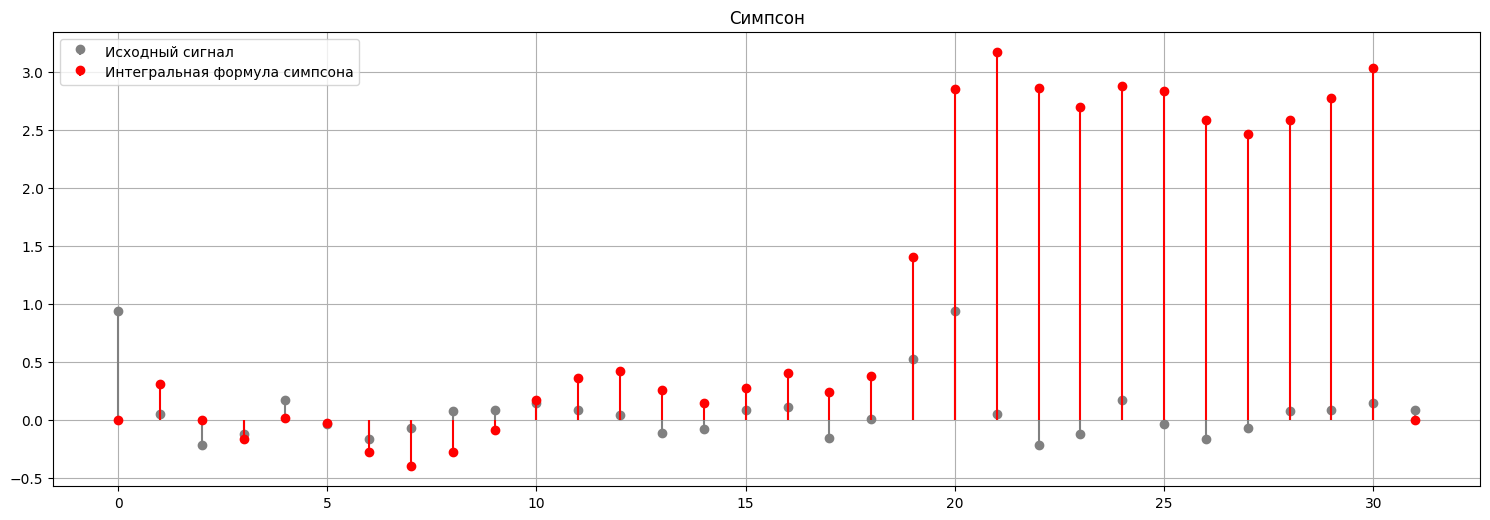

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, integ_simp, 'r', label='Интегральная формула симпсона', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Симпсон')

plt.tight_layout()
plt.show()

In [ ]:
spectrum_rec = np.zeros(N + 1, dtype = 'complex')
spectrum_trap = np.zeros(N + 1, dtype = 'complex')
spectrum_simp = np.zeros(N + 1, dtype = 'complex')

for k in range(N + 1):
    for m in range(N + 1):
        spectrum_rec[k] += integ_rec[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))
        spectrum_trap[k] += integ_trap[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))
        spectrum_simp[k] += integ_simp[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

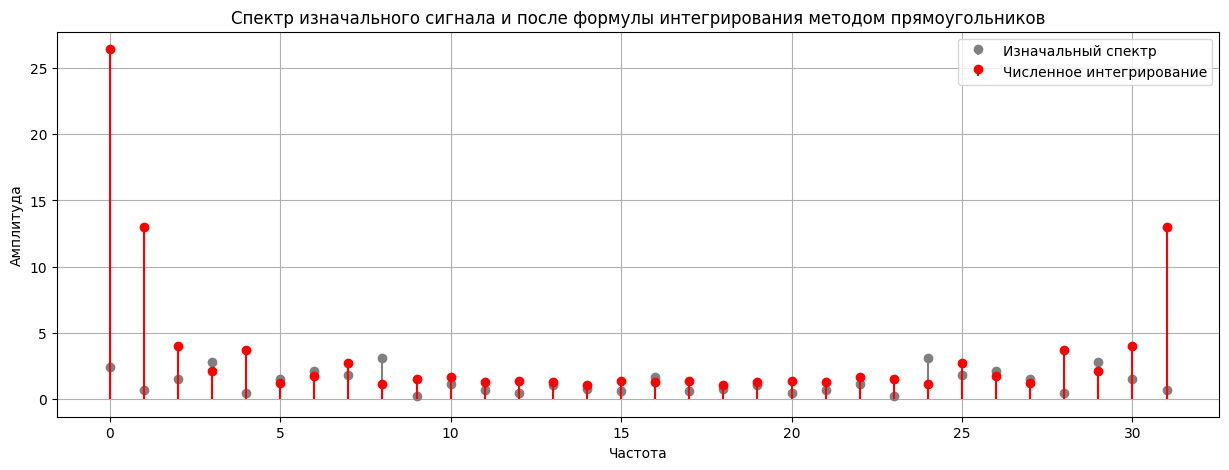

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и после формулы интегрирования методом прямоугольников')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_rec), linefmt='red',
         markerfmt='red', basefmt=' ', label='Численное интегрирование')
plt.legend()
plt.show()

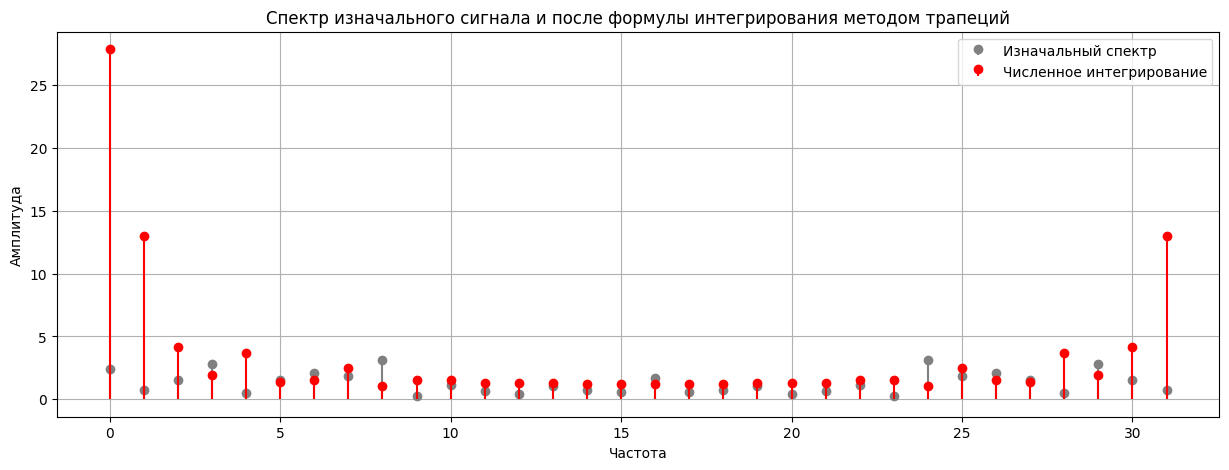

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и после формулы интегрирования методом трапеций')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_trap), linefmt='red',
         markerfmt='red', basefmt=' ', label='Численное интегрирование')
plt.legend()
plt.show()

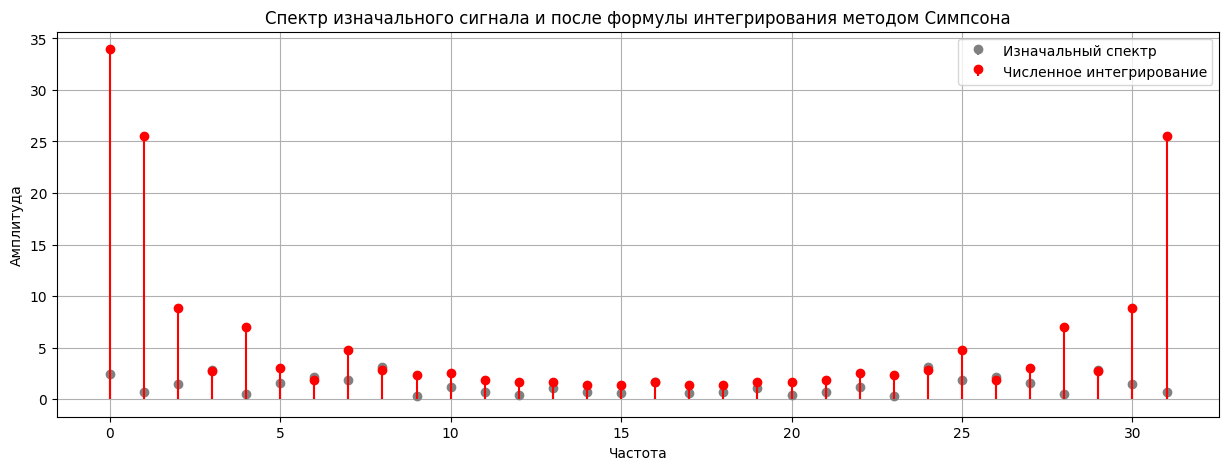

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и после формулы интегрирования методом Симпсона')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_simp), linefmt='red',
         markerfmt='red', basefmt=' ', label='Численное интегрирование')
plt.legend()
plt.show()

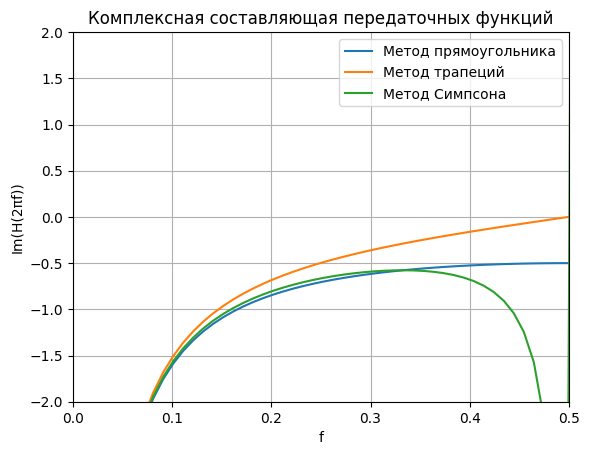

In [ ]:
t = np.linspace(0, 1, 100)
w = 2 * np.pi * np.linspace(0.001, 1, 100)

H_rec =  np.imag(1/ (2j * np.sin(w / 2)))
H_trap = np.imag(np.cos(w / 2)/(2j*np.sin(w / 2)))
H_simps = np.imag((2 + np.cos(w)) / (3j * np.sin(w)))
H_rec[abs(H_rec) > 15] = np.nan
H_trap[abs(H_trap) > 15] = np.nan
H_simps[abs(H_simps) > 15] = np.nan



plt.plot(t, H_rec, label="Метод прямоугольника")
plt.plot(t, H_trap, label="Метод трапеций")
plt.plot(t, H_simps, label="Метод Симпсона")
plt.xlim(0, 0.5)
plt.ylim(-2, 2)
plt.xlabel('f')
plt.ylabel('Im(H(2πf))')
plt.grid()
plt.title("Комплексная составляющая передаточных функций")
plt.legend()

plt.show()
plt.show()

Из графиков передаточных функций видно, что для всех методов численного интегрирования наблюдается усиление низких частот, а метод Симпсона также усиливает высокие частоты. Все остальные частоты все методы подавляют. Что соответствует полученным ранее графикам.

## Выводы



Было проведена фильтрация сигнала дискретными фильтрами, основанными на формулах численного дифференцирования и интегрирования. После применения фильтров, получены спектры для изначального и отфильтрованного сигнала с использованием ДПФ.
При сравнении результатов и передаточных функций выявлено соответствие.